In [ ]:
%cp '/content/drive/My Drive/ICIP2020-fisheye-dataset-30072020.zip' '/content'

In [ ]:
from zipfile import ZipFile
with ZipFile('/content/ICIP2020-fisheye-dataset-30072020.zip', 'r') as zipref:
    zipref.extractall()

In [ ]:
#!python3 coco_annotation_generator.py --image_source_path '/content/fisheye-night-test-30072020/images' --label_source_path '/content/fisheye-night-test-30072020/labels' --save_path '/content/drive/Shared drives/PrasunGallery/Tide Analysis' --file_name 'gt_night.json' --library 'mmdet' 

100% 1166/1166 [00:00<00:00, 2574.04it/s]


In [ ]:
#!python3 coco_annotation_generator.py --image_source_path '/content/fisheye-day-test-30072020/images' --label_source_path '/content/fisheye-day-test-30072020/labels' --save_path '/content/drive/Shared drives/PrasunGallery/Tide Analysis' --file_name 'gt_day.json' --library 'mmdet'

100% 1660/1660 [00:04<00:00, 413.17it/s]


In [ ]:
!nvidia-smi

Sun Oct 18 12:16:50 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install "git+https://github.com/open-mmlab/cocoapi.git#subdirectory=pycocotools"
!pip install -U torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html
!pip install mmcv-full==latest+torch1.5.0+cu101 -f https://openmmlab.oss-accelerate.aliyuncs.com/mmcv/dist/index.html

  Cloning https://github.com/open-mmlab/cocoapi.git to /tmp/pip-req-build-7rkvkfrq
  Running command git clone -q https://github.com/open-mmlab/cocoapi.git /tmp/pip-req-build-7rkvkfrq
  Created wheel for mmpycocotools: filename=mmpycocotools-12.0.3-cp36-cp36m-linux_x86_64.whl size=266777 sha256=be1c99e943be5d0e3812318d0c61616227bdfff036492c2d20bb831e74db918b
  Stored in directory: /tmp/pip-ephem-wheel-cache-ilbe6s9x/wheels/cd/f6/de/018ccc2d175046c612e93b42a169cd1ab7563d61581cfba8df
Successfully built mmpycocotools
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 704.4MB 27kB/s 
     |████████████████████████████████| 6.6MB 28.9MB/s 
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101
Looking in li

In [ ]:
!rm -rf mmdetection
!git clone --branch v2.2.1 https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -e .

Cloning into 'mmdetection'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 13829 (delta 1), reused 0 (delta 0), pack-reused 13821
Receiving objects: 100% (13829/13829), 14.00 MiB | 26.59 MiB/s, done.
Resolving deltas: 100% (9370/9370), done.
Note: checking out '6495391749dfb195de00741057117a199792877a'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

/content/mmdetection
Obtaining file:///content/mmdetection
     |████████████████████████████████| 153kB 2.9MB/s 
     |████████████████████████████████| 2.1MB 7.5MB/s 
  Created wheel for mmcv

In [ ]:
!pip3 install tidecv

In [ ]:
from mmdet.apis import inference_detector, init_detector
import pandas as pd
import os
import numpy as np
import json


In [ ]:
config_path = '/content/drive/Shared drives/PrasunGallery/gfocal/gfocal_config.py'
weight_path = '/content/drive/Shared drives/PrasunGallery/gfocal/epoch_2.pth'
test_folder = '/content/fisheye-day-test-30072020/images'
score_thresh = 0.05
gt_file = '/content/drive/Shared drives/PrasunGallery/Tide Analysis/gt_day.json'
save_path = '/content/drive/Shared drives/PrasunGallery/Tide Analysis/epoch 2 result/validation_day_05.json'

In [ ]:
def optimizer(config_path, weight_path, test_folder, score_thresh, gt_file, save_path):
    model = init_detector(config_path, weight_path)
    with open(gt_file, 'r') as json_file:
        gt_data = json.load(json_file)

    test_images = gt_data['images']
    from tqdm import tqdm
    total_result = []

    for i in tqdm(range(len(test_images))):
        img_name = test_images[i]['file_name']
        image_path = os.path.join(test_folder, img_name)
        image_id = test_images[i]['id']

        result = inference_detector(model, image_path)
        bboxes = np.vstack(result)
        scores = bboxes[:, -1]
        inds = scores > score_thresh
        bboxes = bboxes[inds, :].astype(float)

        if bboxes.size ==0:
            print(img_name)
            continue
        else:
            for bbox in bboxes:
                bb = bbox[0:4]
                confidence = bbox[-1]
                result_dic = {
                    'image_id' : image_id,
                    'category_id' : 0, #for mmdet it will be 0, otherwise it will be 1 for detectron
                    'bbox' : [bb[0], bb[1], abs(bb[2]-bb[0]), abs(bb[3]-bb[1])],
                    'score' : confidence
                }
                total_result.append(result_dic)

    json_object = json.dumps(total_result)

    with open(save_path, 'w') as fileboject:
        fileboject.write(json_object)

In [ ]:
dataset = ['day', 'night']
scores = [0.05, .3, .4, .45, .5, .6]
epochs = [2, 3]

for epoch in epochs:
    for data in dataset:
        for score in scores:
            print(epoch, data, score)
            config_path = '/content/drive/Shared drives/PrasunGallery/gfocal/gfocal_config.py'
            weight_path = '/content/drive/Shared drives/PrasunGallery/gfocal/epoch_{}.pth'.format(epoch)
            test_folder = '/content/fisheye-{}-test-30072020/images'.format(data)
            score_thresh = score
            gt_file = '/content/drive/Shared drives/PrasunGallery/Tide Analysis/gt_{}.json'.format(data)
            save_path = '/content/drive/Shared drives/PrasunGallery/Tide Analysis/epoch {} result/validation_{}_{}.json'.format(epoch, data, score)
            optimizer(config_path = config_path, weight_path = weight_path, test_folder = test_folder, score_thresh = score_thresh, gt_file = gt_file, save_path = save_path)


2 day 0.05


100%|██████████| 1660/1660 [07:29<00:00,  3.69it/s]


2 day 0.3


100%|██████████| 1660/1660 [07:29<00:00,  3.69it/s]


2 day 0.4


100%|██████████| 1660/1660 [07:29<00:00,  3.69it/s]


2 day 0.45


100%|██████████| 1660/1660 [07:26<00:00,  3.72it/s]


2 day 0.5


100%|██████████| 1660/1660 [07:28<00:00,  3.70it/s]


2 day 0.6


100%|██████████| 1660/1660 [07:27<00:00,  3.71it/s]


2 night 0.05


100%|██████████| 1166/1166 [05:16<00:00,  3.68it/s]


2 night 0.3


100%|██████████| 1166/1166 [05:15<00:00,  3.69it/s]


2 night 0.4


100%|██████████| 1166/1166 [05:15<00:00,  3.70it/s]


2 night 0.45


100%|██████████| 1166/1166 [05:17<00:00,  3.68it/s]


2 night 0.5


100%|██████████| 1166/1166 [05:16<00:00,  3.68it/s]


2 night 0.6


100%|██████████| 1166/1166 [05:16<00:00,  3.68it/s]


3 day 0.05


100%|██████████| 1660/1660 [07:30<00:00,  3.68it/s]


3 day 0.3


100%|██████████| 1660/1660 [07:28<00:00,  3.70it/s]


3 day 0.4


100%|██████████| 1660/1660 [07:28<00:00,  3.70it/s]


3 day 0.45


100%|██████████| 1660/1660 [07:26<00:00,  3.72it/s]


3 day 0.5


100%|██████████| 1660/1660 [07:27<00:00,  3.71it/s]


3 day 0.6


100%|██████████| 1660/1660 [07:30<00:00,  3.69it/s]


3 night 0.05


100%|██████████| 1166/1166 [05:15<00:00,  3.69it/s]


3 night 0.3


100%|██████████| 1166/1166 [05:15<00:00,  3.69it/s]


3 night 0.4


100%|██████████| 1166/1166 [05:14<00:00,  3.70it/s]


3 night 0.45


100%|██████████| 1166/1166 [05:16<00:00,  3.68it/s]


3 night 0.5


100%|██████████| 1166/1166 [05:15<00:00,  3.70it/s]


3 night 0.6


100%|██████████| 1166/1166 [05:15<00:00,  3.70it/s]


In [ ]:
gt_file = '/content/drive/Shared drives/PrasunGallery/Tide Analysis/gt_day.json'
save_path = '/content/drive/Shared drives/PrasunGallery/Tide Analysis/epoch 2 result/validation_day_0.4.json'
from tidecv import TIDE
import tidecv.datasets as datasets
gt = datasets.COCO(path = gt_file)
bbox_result = datasets.COCOResult(path = save_path)
tide = TIDE()
tide.evaluate_range(gt, bbox_result, mode=TIDE.BOX )
tide.summarize()

FileNotFoundError: ignored

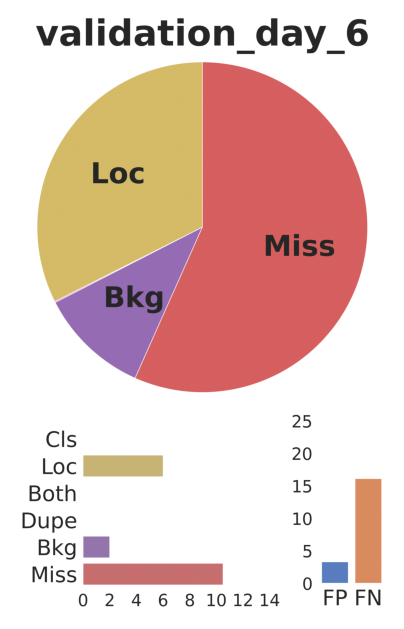

In [ ]:
tide.plot()